In [ ]:
'''US Indices of Industrial Production: 1947-1993 (Monthly) 

Overall Index benchmarked at 100 in May 1992
All indices have been seasonally adjusted 

Source:  Federal Reserve Statistical Release G.17

"YR     =  Year"
"MN     =  Month"
"IP     =  Industrial Production (IP), total index"
"MFG    =  IP: Manufacturing"
"MFGD   =  IP: Manufacturing, Durable"
"MFGN   =  IP: Manufacturing, Nondurable"
"MIN    =  IP: Mining"
"UTIL   =  IP: Utilities"
"P      =  IP: Products, total"
"MAT    =  IP: Materials"'''

In [1]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv("industrial_production.txt",sep=",",index_col= False)
df['date'] = df['MN'].map(str)+u"/01/19"+df['YR'].map(str)
df['ds'] = pd.to_datetime(df['date'])
#df = df.set_index('date')
df.drop(labels = ['YR','MN'], inplace = True, axis = 1)
df.head()

,IP,MFG,MFGD,MFGN,MIN,UTIL,P,MAT,date,ds
0,21.4,20.4,19.1,21.6,54.8,10.0,21.0,21.7,1/01/1947,1947-01-01
1,21.5,20.4,19.4,21.5,55.4,10.1,21.0,21.8,2/01/1947,1947-02-01
2,21.7,20.5,19.6,21.5,56.4,10.2,21.1,22.6,3/01/1947,1947-03-01
3,21.5,20.6,19.8,21.3,51.7,10.4,21.1,22.0,4/01/1947,1947-04-01
4,21.6,20.4,19.8,21.1,55.9,10.6,21.2,22.1,5/01/1947,1947-05-01


In [3]:
from fbprophet import Prophet

In [4]:
m = Prophet()

In [35]:
df['y'] = df.IP.diff(1)
df = df.iloc[1:]

In [36]:
df.head()

,IP,MFG,MFGD,MFGN,MIN,UTIL,P,MAT,date,ds,y
1,21.5,20.4,19.4,21.5,55.4,10.1,21.0,21.8,2/01/1947,1947-02-01,0.1
2,21.7,20.5,19.6,21.5,56.4,10.2,21.1,22.6,3/01/1947,1947-03-01,0.2
3,21.5,20.6,19.8,21.3,51.7,10.4,21.1,22.0,4/01/1947,1947-04-01,-0.2
4,21.6,20.4,19.8,21.1,55.9,10.6,21.2,22.1,5/01/1947,1947-05-01,0.1
5,21.6,20.4,19.9,21.0,55.5,10.6,21.1,21.9,6/01/1947,1947-06-01,0.0


In [37]:
m.fit(df)

In [38]:
#Make Future Command creates a blank dataframe with the appropriate number of periods into the future
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
923,1994-11-27
924,1994-11-28
925,1994-11-29
926,1994-11-30
927,1994-12-01


In [39]:
#Predict generates future estimates with a upper/lower "uncertainty" band 
#... the uncertainty bands do not represent mathmatical confidence intervals
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
923,1994-11-27,0.286091,-0.378793,0.992834
924,1994-11-28,0.233303,-0.478495,0.947537
925,1994-11-29,0.172284,-0.505681,0.900698
926,1994-11-30,0.259408,-0.491945,0.919056
927,1994-12-01,0.073433,-0.622401,0.754632


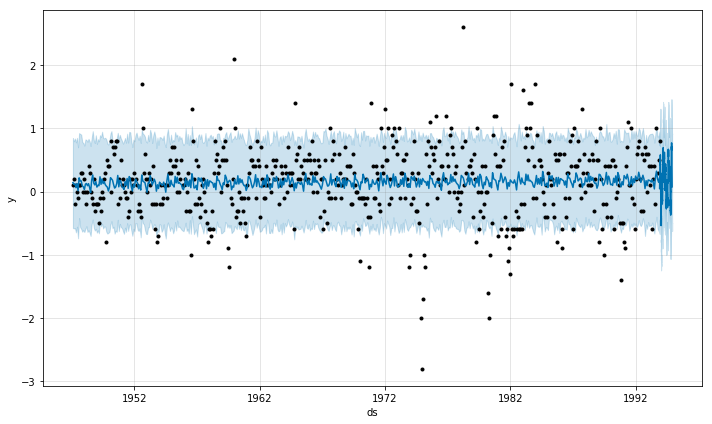

In [40]:
m.plot(forecast)

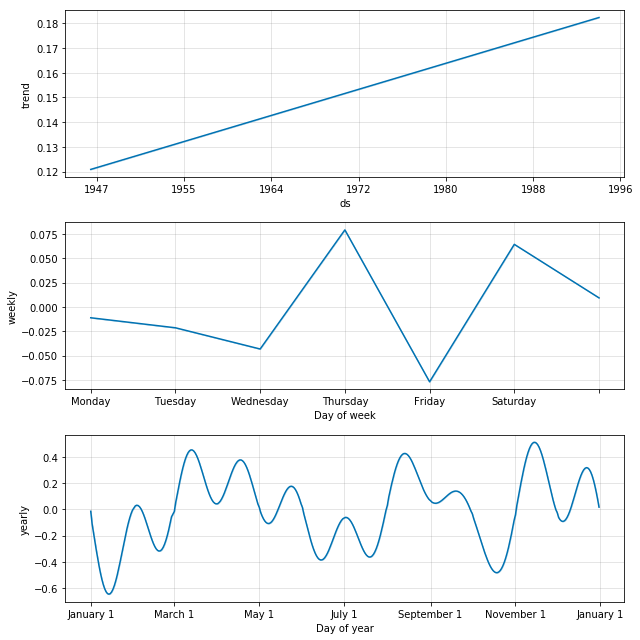

In [41]:
m.plot_components(forecast)